# PROBLEM STATEMENT
## Predicting Customer Churn in Telecommunication Industry
#### The problem is to develop a machine learning model that can accurately identify customers who are likely to churn from a telecommunications company. The dataset provided contains various features related to customer behavior, usage patterns, and demographics. The goal is to build a predictive model that can help the telecom company proactively take measures to retain at-risk customers and reduce churn

## Features Used
1) Years_stayed: This column represents the number of years a customer has stayed with the telecom service provider. It indicates the duration of the customer's relationship with the company.

2) PAID_AMOUNT: This column represents the amount of money paid by the customer for the telecom services. It could include payments for plans, services, and additional features.

3) LINE_REV: This column represents the revenue generated from the customer's telephone line. It could include charges for voice calls, messaging, and other related services.

4) BILL_AMOUNT: This column represents the total amount billed to the customer for the telecom services. It encompasses charges for various services and features.

5) MOUS_TO_LOCAL_LANDLINES: MOUS stands for "Minutes of Usage per Subscriber." This column represents the number of minutes a customer uses for calls to local landline numbers.

6) SOCIO_ECONOMIC_SEGMENT: This column represents the socio-economic segment to which the customer belongs. It categorizes customers based on factors such as income level, occupation, and lifestyle.

7) MOUS_TO_LOCAL_MOBILES: Similar to the previous column, this represents the number of minutes a customer uses for calls to local mobile numbers.

8) MOUS_FROM_LOCAL_MOBILES: This column represents the number of minutes a customer receives calls from local mobile numbers.

9) STATUS: This column indicates the current status of the customer's account. It could include values like "ACTIVE," "Out Going Bar Confirmed," "TOSSED," etc., representing different account states.

10) MOUS_FROM_LOCAL_LANDLINES: Represents minutes of incoming calls from local landline numbers, aiding in analyzing customer interaction patterns and optimizing service strategies for improved retention and satisfaction.

These columns contain various features and attributes related to customer behavior, usage, and account status, which can be used to predict customer churn and make informed business decisions.







In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

/home/u211372/tmp/ipykernel_3522791/2748244561.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv("telecom_churn_pred.csv")

In [3]:
df.head()

,Unnamed: 0,PTY_PROFILE_SUB_TYPE,SOCIO_ECONOMIC_SEGMENT,PARTY_NATIONALITY,PARTY_GENDER_CD,TARGET,YEAR_JOINED,CURRENT_YEAR,BILL_AMOUNT,PAID_AMOUNT,PAYMENT_TRANSACTIONS,PARTY_REV,PREPAID_LINES,POSTPAID_LINES,OTHER_LINES,LINE_REV,STATUS,MOUS_TO_LOCAL_MOBILES,MOUS_FROM_LOCAL_MOBILES,MOUS_TO_LOCAL_LANDLINES,MOUS_FROM_LOCAL_LANDLINES,MOUS_TO_INT_NUMBER,MOUS_FROM_INT_NUMBER,DATA_IN_BNDL,DATA_OUT_BNDL,DATA_USG_PAYG,COMPLAINTS,Years_stayed
0,0,Residential,EMIRATI,United Arab Emirates,M,0,1994,2019,931.208938,812.175000,1,5968.700000,2,6,2,945.040000,ACTIVE,1004.070,35.850,34.015,72.075,141.840,56.115,11944.079102,0.0,0.0,0,25
1,1,Prestige,EMIRATI,United Arab Emirates,M,0,1994,2019,431.082618,486.500000,1,6245.141667,6,4,2,493.815000,ACTIVE,159.050,10.595,7.715,11.750,5.110,0.000,9903.157715,0.0,0.0,0,25
2,2,Residential,EMIRATI,United Arab Emirates,M,0,1994,2019,50.619644,52.815000,1,1666.488333,2,3,1,50.300000,ACTIVE,0.000,0.000,0.000,0.000,0.000,0.000,0.102539,0.0,0.0,0,25
3,3,Prestige,EMIRATI,United Arab Emirates,M,0,1994,2019,399.710034,422.235000,1,2522.008333,3,4,3,406.586667,ACTIVE,288.805,158.500,2.670,15.965,0.000,0.000,3600.322266,0.0,0.0,0,25
4,4,Residential,EMIRATI,United Arab Emirates,M,0,1994,2019,612.665844,825.888333,1,1219.961667,0,2,1,751.185000,ACTIVE,209.760,186.050,17.515,28.685,3.235,4.475,3852.026367,0.0,0.0,0,25


In [4]:
df.shape

(1140604, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140604 entries, 0 to 1140603
Data columns (total 28 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Unnamed: 0                 1140604 non-null  int64  
 1   PTY_PROFILE_SUB_TYPE       1140604 non-null  object 
 2   SOCIO_ECONOMIC_SEGMENT     1140604 non-null  object 
 3   PARTY_NATIONALITY          1140604 non-null  object 
 4   PARTY_GENDER_CD            1140604 non-null  object 
 5   TARGET                     1140604 non-null  int64  
 6   YEAR_JOINED                1140604 non-null  int64  
 7   CURRENT_YEAR               1140604 non-null  int64  
 8   BILL_AMOUNT                1140604 non-null  float64
 9   PAID_AMOUNT                1140604 non-null  float64
 10  PAYMENT_TRANSACTIONS       1140604 non-null  int64  
 11  PARTY_REV                  1140604 non-null  float64
 12  PREPAID_LINES              1140604 non-null  int64  
 13  POSTPAID_LIN

In [6]:
df.describe(include='all')

,Unnamed: 0,PTY_PROFILE_SUB_TYPE,SOCIO_ECONOMIC_SEGMENT,PARTY_NATIONALITY,PARTY_GENDER_CD,TARGET,YEAR_JOINED,CURRENT_YEAR,BILL_AMOUNT,PAID_AMOUNT,PAYMENT_TRANSACTIONS,PARTY_REV,PREPAID_LINES,POSTPAID_LINES,OTHER_LINES,LINE_REV,STATUS,MOUS_TO_LOCAL_MOBILES,MOUS_FROM_LOCAL_MOBILES,MOUS_TO_LOCAL_LANDLINES,MOUS_FROM_LOCAL_LANDLINES,MOUS_TO_INT_NUMBER,MOUS_FROM_INT_NUMBER,DATA_IN_BNDL,DATA_OUT_BNDL,DATA_USG_PAYG,COMPLAINTS,Years_stayed
count,1.140604e+06,1140604,1140604,1140604,1140604,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,1140604,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06,1.140604e+06
unique,NaN,3,3,191,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Residential,EXPATS,United Arab Emirates,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACTIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,924545,634602,440990,906754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1056991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.703077e+05,NaN,NaN,NaN,NaN,5.278344e-02,2.013381e+03,2.018947e+03,3.811804e+02,3.921391e+02,1.346936e+00,1.910809e+03,2.144700e+00,3.989309e+00,8.991026e-01,3.827475e+02,NaN,3.931814e+02,1.294176e+02,1.717134e+01,3.618600e+01,5.108442e+01,6.840673e+00,1.049152e+04,1.517181e-01,1.682793e+02,7.877668e-02,5.566531e+00
std,3.292671e+05,NaN,NaN,NaN,NaN,2.236010e-01,6.082378e+00,2.236010e-01,3.697039e+02,3.725608e+02,7.309284e-01,1.837015e+04,5.751809e+00,4.395115e+01,7.864311e+00,3.619628e+02,NaN,9.016017e+02,2.989452e+02,3.857446e+01,1.200172e+02,1.144493e+02,3.560459e+01,3.357222e+04,7.416291e+00,6.918396e+03,3.247740e-01,6.104279e+00
min,0.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,1.994000e+03,2.018000e+03,-2.810494e+03,0.000000e+00,0.000000e+00,-2.011420e+03,0.000000e+00,1.000000e+00,0.000000e+00,-1.367315e+03,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.851548e+05,NaN,NaN,NaN,NaN,0.000000e+00,2.013000e+03,2.019000e+03,1.741378e+02,1.816667e+02,1.000000e+00,4.231879e+02,0.000000e+00,1.000000e+00,0.000000e+00,1.766633e+02,NaN,2.892000e+01,4.250000e-01,3.500000e-01,1.500000e-02,0.000000e+00,0.000000e+00,7.081016e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
50%,5.703065e+05,NaN,NaN,NaN,NaN,0.000000e+00,2.016000e+03,2.019000e+03,2.907239e+02,3.007292e+02,1.000000e+00,8.347133e+02,1.000000e+00,2.000000e+00,0.000000e+00,2.956017e+02,NaN,1.703800e+02,2.944500e+01,7.160000e+00,1.002500e+01,2.175000e+00,0.000000e+00,4.394219e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
75%,8.554612e+05,NaN,NaN,NaN,NaN,0.000000e+00,2.017000e+03,2.019000e+03,4.609771e+02,4.764233e+02,2.000000e+00,1.553675e+03,3.000000e+00,3.000000e+00,1.000000e+00,4.648704e+02,NaN,4.695400e+02,1.418950e+02,2.203500e+01,3.926000e+01,5.409000e+01,1.710000e+00,9.955910e+03,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00


In [7]:
df.columns

Index(['Unnamed: 0', 'PTY_PROFILE_SUB_TYPE', 'SOCIO_ECONOMIC_SEGMENT',
       'PARTY_NATIONALITY', 'PARTY_GENDER_CD', 'TARGET', 'YEAR_JOINED',
       'CURRENT_YEAR', 'BILL_AMOUNT', 'PAID_AMOUNT', 'PAYMENT_TRANSACTIONS',
       'PARTY_REV', 'PREPAID_LINES', 'POSTPAID_LINES', 'OTHER_LINES',
       'LINE_REV', 'STATUS', 'MOUS_TO_LOCAL_MOBILES',
       'MOUS_FROM_LOCAL_MOBILES', 'MOUS_TO_LOCAL_LANDLINES',
       'MOUS_FROM_LOCAL_LANDLINES', 'MOUS_TO_INT_NUMBER',
       'MOUS_FROM_INT_NUMBER', 'DATA_IN_BNDL', 'DATA_OUT_BNDL',
       'DATA_USG_PAYG', 'COMPLAINTS', 'Years_stayed'],
      dtype='object')

In [8]:
df.isnull().sum()

Unnamed: 0                   0
PTY_PROFILE_SUB_TYPE         0
SOCIO_ECONOMIC_SEGMENT       0
PARTY_NATIONALITY            0
PARTY_GENDER_CD              0
TARGET                       0
YEAR_JOINED                  0
CURRENT_YEAR                 0
BILL_AMOUNT                  0
PAID_AMOUNT                  0
PAYMENT_TRANSACTIONS         0
PARTY_REV                    0
PREPAID_LINES                0
POSTPAID_LINES               0
OTHER_LINES                  0
LINE_REV                     0
STATUS                       0
MOUS_TO_LOCAL_MOBILES        0
MOUS_FROM_LOCAL_MOBILES      0
MOUS_TO_LOCAL_LANDLINES      0
MOUS_FROM_LOCAL_LANDLINES    0
MOUS_TO_INT_NUMBER           0
MOUS_FROM_INT_NUMBER         0
DATA_IN_BNDL                 0
DATA_OUT_BNDL                0
DATA_USG_PAYG                0
COMPLAINTS                   0
Years_stayed                 0
dtype: int64

In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
df.columns

Index(['PTY_PROFILE_SUB_TYPE', 'SOCIO_ECONOMIC_SEGMENT', 'PARTY_NATIONALITY',
       'PARTY_GENDER_CD', 'TARGET', 'YEAR_JOINED', 'CURRENT_YEAR',
       'BILL_AMOUNT', 'PAID_AMOUNT', 'PAYMENT_TRANSACTIONS', 'PARTY_REV',
       'PREPAID_LINES', 'POSTPAID_LINES', 'OTHER_LINES', 'LINE_REV', 'STATUS',
       'MOUS_TO_LOCAL_MOBILES', 'MOUS_FROM_LOCAL_MOBILES',
       'MOUS_TO_LOCAL_LANDLINES', 'MOUS_FROM_LOCAL_LANDLINES',
       'MOUS_TO_INT_NUMBER', 'MOUS_FROM_INT_NUMBER', 'DATA_IN_BNDL',
       'DATA_OUT_BNDL', 'DATA_USG_PAYG', 'COMPLAINTS', 'Years_stayed'],
      dtype='object')

In [11]:
df.head()

,PTY_PROFILE_SUB_TYPE,SOCIO_ECONOMIC_SEGMENT,PARTY_NATIONALITY,PARTY_GENDER_CD,TARGET,YEAR_JOINED,CURRENT_YEAR,BILL_AMOUNT,PAID_AMOUNT,PAYMENT_TRANSACTIONS,PARTY_REV,PREPAID_LINES,POSTPAID_LINES,OTHER_LINES,LINE_REV,STATUS,MOUS_TO_LOCAL_MOBILES,MOUS_FROM_LOCAL_MOBILES,MOUS_TO_LOCAL_LANDLINES,MOUS_FROM_LOCAL_LANDLINES,MOUS_TO_INT_NUMBER,MOUS_FROM_INT_NUMBER,DATA_IN_BNDL,DATA_OUT_BNDL,DATA_USG_PAYG,COMPLAINTS,Years_stayed
0,Residential,EMIRATI,United Arab Emirates,M,0,1994,2019,931.208938,812.175000,1,5968.700000,2,6,2,945.040000,ACTIVE,1004.070,35.850,34.015,72.075,141.840,56.115,11944.079102,0.0,0.0,0,25
1,Prestige,EMIRATI,United Arab Emirates,M,0,1994,2019,431.082618,486.500000,1,6245.141667,6,4,2,493.815000,ACTIVE,159.050,10.595,7.715,11.750,5.110,0.000,9903.157715,0.0,0.0,0,25
2,Residential,EMIRATI,United Arab Emirates,M,0,1994,2019,50.619644,52.815000,1,1666.488333,2,3,1,50.300000,ACTIVE,0.000,0.000,0.000,0.000,0.000,0.000,0.102539,0.0,0.0,0,25
3,Prestige,EMIRATI,United Arab Emirates,M,0,1994,2019,399.710034,422.235000,1,2522.008333,3,4,3,406.586667,ACTIVE,288.805,158.500,2.670,15.965,0.000,0.000,3600.322266,0.0,0.0,0,25
4,Residential,EMIRATI,United Arab Emirates,M,0,1994,2019,612.665844,825.888333,1,1219.961667,0,2,1,751.185000,ACTIVE,209.760,186.050,17.515,28.685,3.235,4.475,3852.026367,0.0,0.0,0,25


In [12]:
mean1=df['PAID_AMOUNT'].mean()
print(mean1)
df['PAID_AMOUNT']=df['PAID_AMOUNT'].replace(np.nan,mean1)

392.13905209725147


In [13]:
mode1=df['SOCIO_ECONOMIC_SEGMENT'].mode().values[0]
df['SOCIO_ECONOMIC_SEGMENT']=df['SOCIO_ECONOMIC_SEGMENT'].replace(np.nan,mode1)

In [14]:
mean2=df['LINE_REV'].mean()
print(mean2)
df['LINE_REV']=df['LINE_REV'].replace(np.nan,mean2)

382.7474757160826


In [15]:
df.isnull().sum()

PTY_PROFILE_SUB_TYPE         0
SOCIO_ECONOMIC_SEGMENT       0
PARTY_NATIONALITY            0
PARTY_GENDER_CD              0
TARGET                       0
YEAR_JOINED                  0
CURRENT_YEAR                 0
BILL_AMOUNT                  0
PAID_AMOUNT                  0
PAYMENT_TRANSACTIONS         0
PARTY_REV                    0
PREPAID_LINES                0
POSTPAID_LINES               0
OTHER_LINES                  0
LINE_REV                     0
STATUS                       0
MOUS_TO_LOCAL_MOBILES        0
MOUS_FROM_LOCAL_MOBILES      0
MOUS_TO_LOCAL_LANDLINES      0
MOUS_FROM_LOCAL_LANDLINES    0
MOUS_TO_INT_NUMBER           0
MOUS_FROM_INT_NUMBER         0
DATA_IN_BNDL                 0
DATA_OUT_BNDL                0
DATA_USG_PAYG                0
COMPLAINTS                   0
Years_stayed                 0
dtype: int64

In [16]:
mean2=df['Years_stayed'].mean()
print(mean2)
df['Years_stayed']=df['Years_stayed'].replace(np.nan,mean2)

5.566531416688


In [17]:
df["STATUS"].unique()

array(['ACTIVE', 'Out Going Bar Confirmed', 'TOSSED', 'Final Warning',
       'Tos Confirmed', 'Out Going Bar Authorized',
       'Identified For Final Warning', 'Tos Authorized',
       'Identified For Out Going Bar'], dtype=object)

In [18]:
df['SOCIO_ECONOMIC_SEGMENT'].unique()

array(['EMIRATI', 'EXPATS', 'YOUTH'], dtype=object)

In [19]:
# Drop unnecessary columns
unnecessary_cols = ['PARTY_NATIONALITY', 'YEAR_JOINED', 'CURRENT_YEAR', 'COMPLAINTS', 'DATA_USG_PAYG','DATA_OUT_BNDL']
df.drop(columns=unnecessary_cols, inplace=True)

In [20]:
df.shape

(1140604, 21)

# Data Visualization

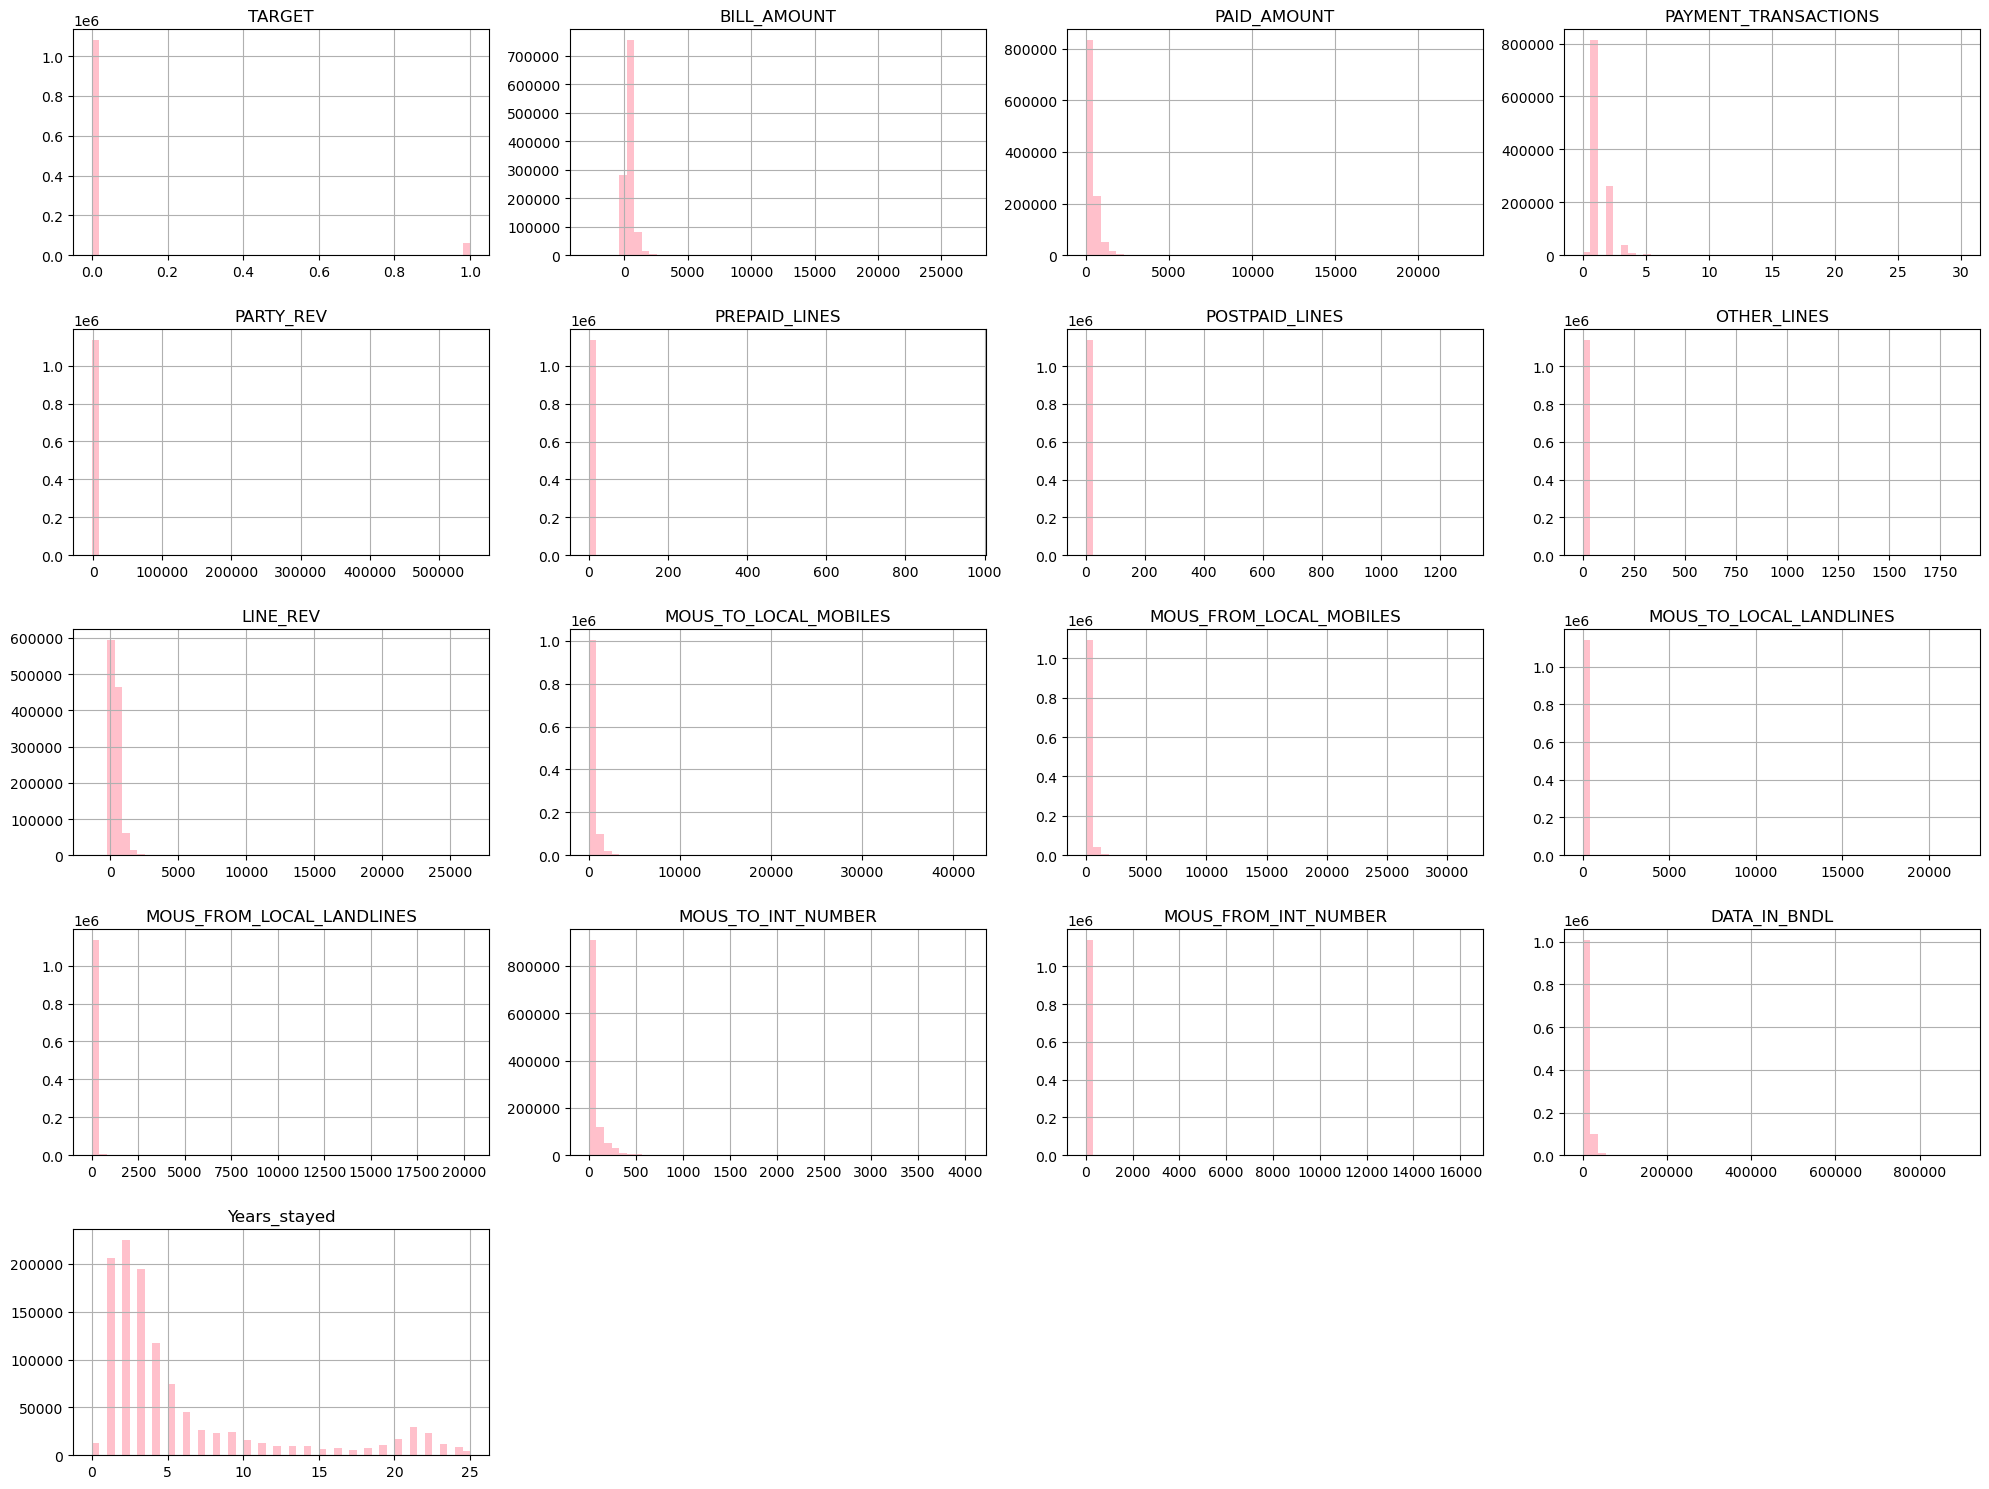

In [21]:
df.hist(bins=50,figsize=(20,15),color='pink')
plt.tight_layout()
plt.show()

These histograms provide insights into the distribution of different features in the dataset, allowing us to observe the patterns and characteristics of the variables. They can aid in identifying potential outliers, understanding data skewness, and making data-driven decisions during the data exploration phase.

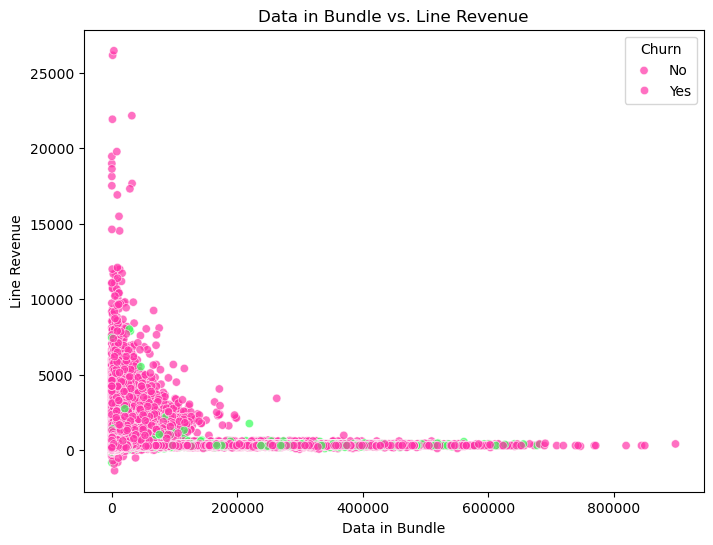

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='DATA_IN_BNDL', y='LINE_REV', data=df, hue='TARGET', palette=['#FF33A8', '#33FF57'], alpha=0.7)
plt.title('Data in Bundle vs. Line Revenue')
plt.xlabel('Data in Bundle')
plt.ylabel('Line Revenue')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


This scatter plot allows us to visualize the relationship between the two variables and how they relate to the churn status, providing insights into potential patterns and correlations in the data.

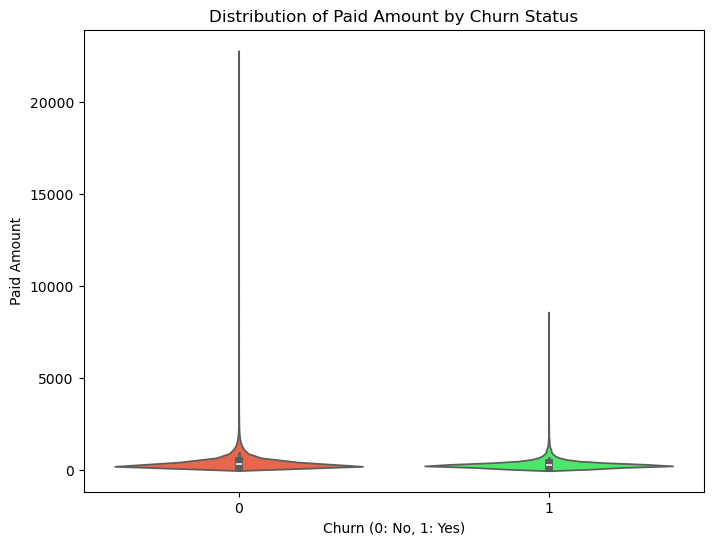

In [23]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='TARGET', y='PAID_AMOUNT', data=df, palette=['#FF5733', '#33FF57'])
plt.title('Distribution of Paid Amount by Churn Status')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Paid Amount')
plt.show()


The violin plot provides an effective way to visualize the distribution of "Paid Amount" for different churn status categories, highlighting potential differences or similarities between customers who churn and those who do not. It can be used to identify patterns in the data and further investigate the relationship between the "Paid Amount" and churn behavior.






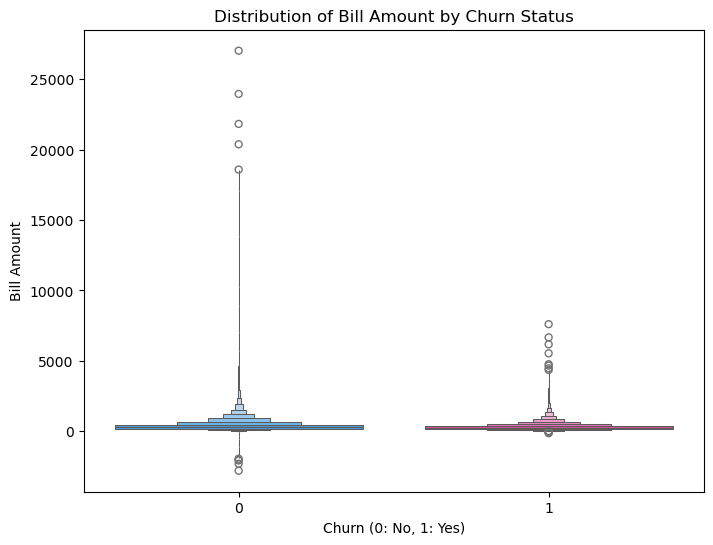

In [24]:
plt.figure(figsize=(8, 6))
sns.boxenplot(x='TARGET', y='BILL_AMOUNT', data=df, palette=['#33A8FF', '#FF33A8'])
plt.title('Distribution of Bill Amount by Churn Status')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Bill Amount')
plt.show()

 The boxen plot provides a clear comparison of the distribution of "Bill Amount" for different churn status categories. It helps identify the variability in bill amounts for customers who churn and those who do not. Additionally, the presence of outliers can indicate potential extreme cases that may require further investigation.






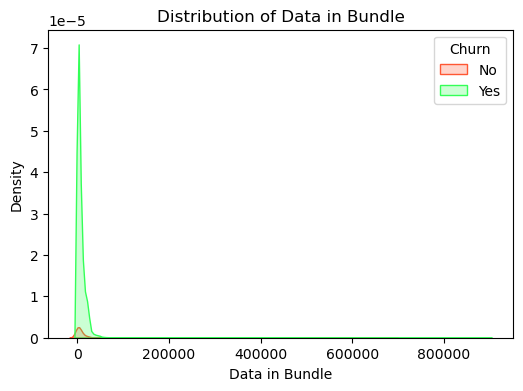

In [25]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='DATA_IN_BNDL', hue='TARGET', fill=True, palette=['#33FF57', '#FF5733'])
plt.title('Distribution of Data in Bundle')
plt.xlabel('Data in Bundle')
plt.ylabel('Density')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

 The KDE(Kernel Density Estimation) plot allows us to observe the distribution of "Data in Bundle" for different churn status categories. The overlapping regions suggest that "Data in Bundle" alone might not be a strong predictor of churn. However, the divergent regions can provide valuable insights into specific data ranges that may contribute more significantly to predicting churn.

 The correlation heatmap helps in understanding the relationships between different numerical features in the dataset. It can be useful for feature selection, identifying multicollinearity, and gaining insights into how variables influence each other.

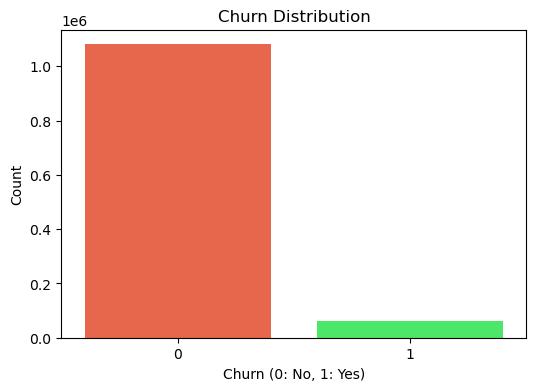

In [26]:
palette1 = ['#FF5733', '#33FF57']
plt.figure(figsize=(6, 4))
sns.countplot(x='TARGET', data=df, palette=palette1)
plt.title('Churn Distribution')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

the count plot provides a quick and informative visualization of the distribution of the target variable, helping in identifying potential class imbalance and understanding the proportion of customers who churned or did not churn in the dataset.

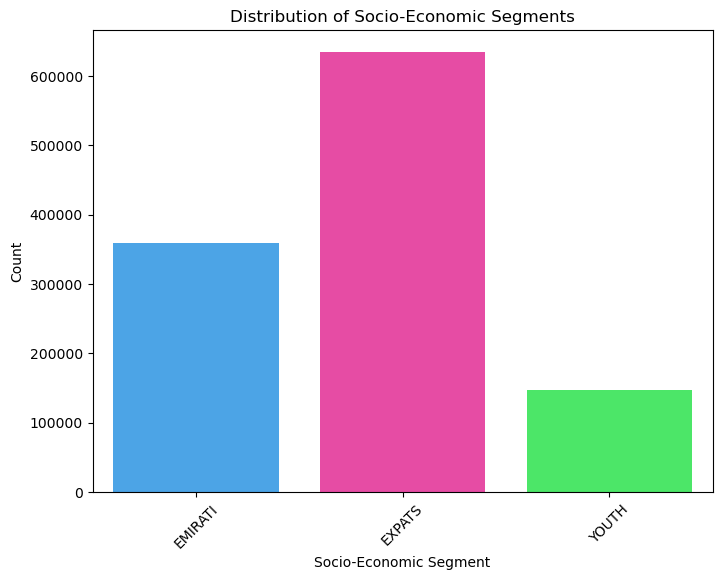

In [27]:
palette2 = ['#33A8FF', '#FF33A8', '#33FF57']
plt.figure(figsize=(8, 6))
sns.countplot(x='SOCIO_ECONOMIC_SEGMENT', data=df, palette=palette2)
plt.title('Distribution of Socio-Economic Segments')
plt.xlabel('Socio-Economic Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

 The count plot offers an insightful representation of the distribution of customers among various Socio-Economic Segments, enabling businesses to understand the customer composition and tailor their strategies accordingly for different segments.

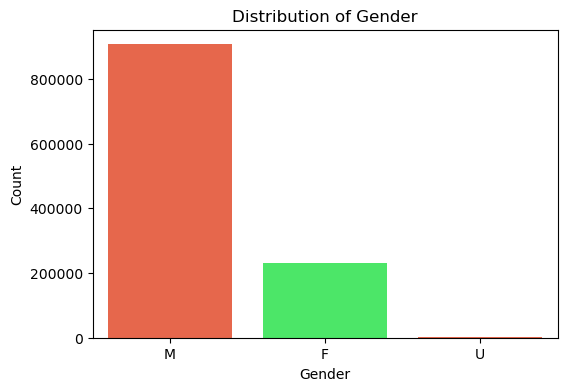

In [28]:
palette3 = ['#FF5733', '#33FF57']
plt.figure(figsize=(6, 4))
sns.countplot(x='PARTY_GENDER_CD', data=df, palette=palette3)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

 The count plot offers valuable insights into the distribution of customers based on gender, enabling businesses to make data-driven decisions and improve customer engagement by understanding the gender demographics of their clientele.

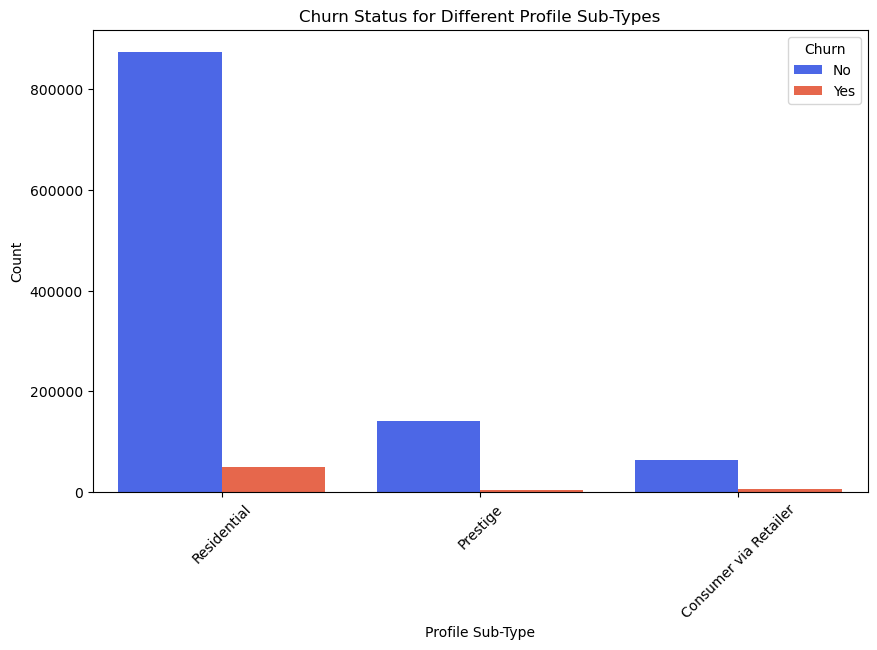

In [29]:
palette4 = ['#3357FF', '#FF5733', '#33FF57', '#FF33A8']
plt.figure(figsize=(10, 6))
sns.countplot(x='PTY_PROFILE_SUB_TYPE', hue='TARGET', data=df, palette=palette4)
plt.title('Churn Status for Different Profile Sub-Types')
plt.xlabel('Profile Sub-Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

The grouped count plot provides valuable insights into the relationship between profile sub-types and churn status, helping businesses tailor their retention strategies and customer engagement initiatives to specific customer segments for better customer retention and satisfaction.






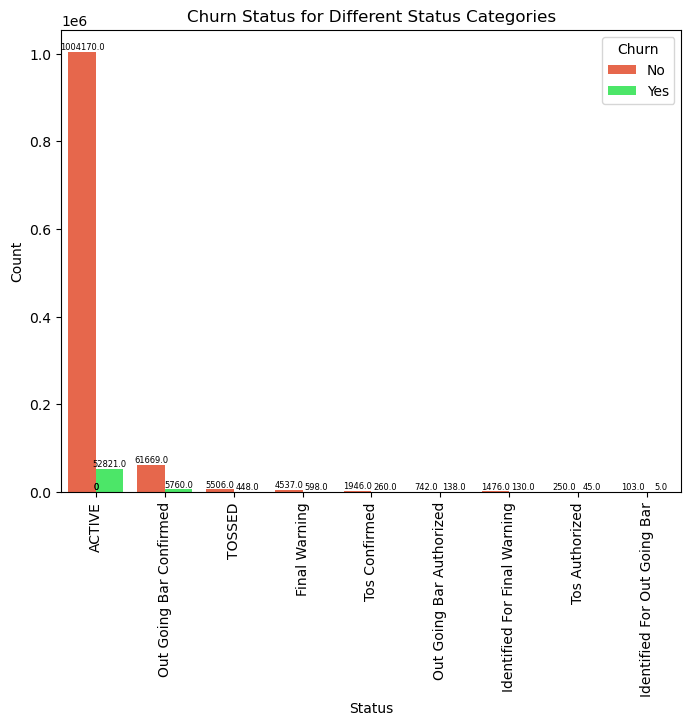

In [30]:
palette5 = ['#FF5733', '#33FF57']
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='STATUS', hue='TARGET', data=df, palette=palette5)
plt.title('Churn Status for Different Status Categories')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Churn', labels=['No', 'Yes'])

# Add counts above each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=6)

plt.show()


 The grouped count plot provides valuable insights into the relationship between status categories and churn status, helping businesses tailor their retention strategies and customer engagement initiatives to specific customer segments for better customer retention and satisfaction.

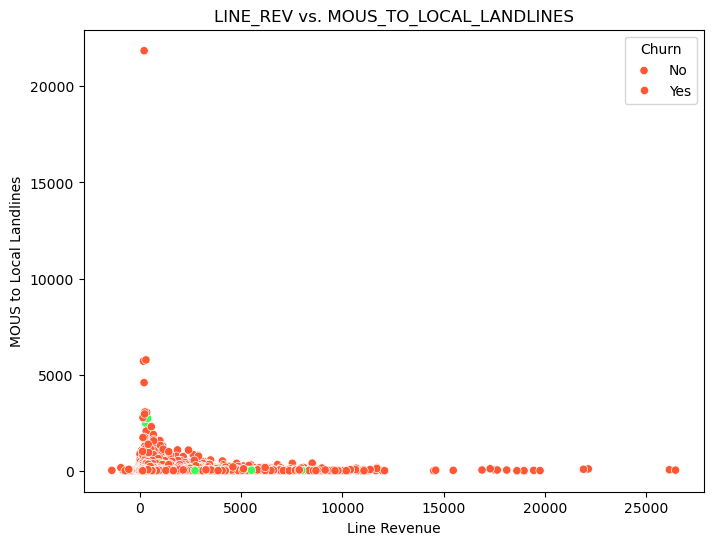

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LINE_REV', y='MOUS_TO_LOCAL_LANDLINES', data=df, hue='TARGET', palette=['#FF5733', '#33FF57'])
plt.title('LINE_REV vs. MOUS_TO_LOCAL_LANDLINES')
plt.xlabel('Line Revenue')
plt.ylabel('MOUS to Local Landlines')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


The scatter plot shows the distribution of data points with respect to "Line Revenue" and "MOUS to Local Landlines" for different churn status categories. However, due to the considerable overlap and lack of clear separation, it suggests that additional features or more sophisticated modeling techniques may be needed to improve churn prediction accuracy.

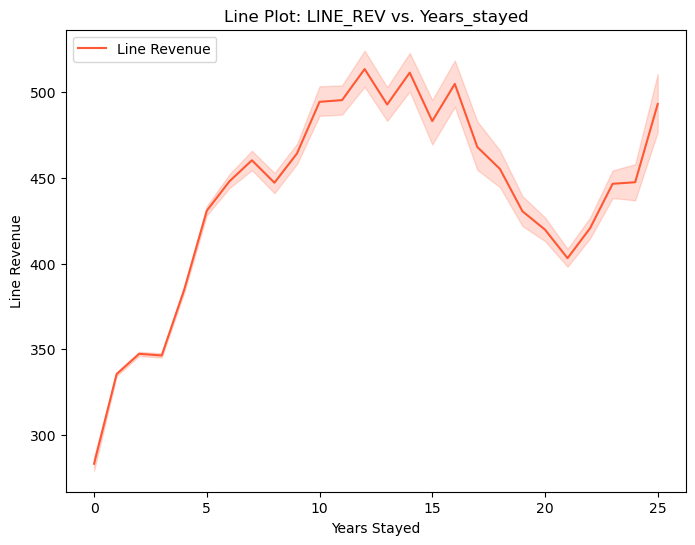

In [32]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Years_stayed', y='LINE_REV', data=df, color='#FF5733', label='Line Revenue')
plt.title('Line Plot: LINE_REV vs. Years_stayed')
plt.xlabel('Years Stayed')
plt.ylabel('Line Revenue')

# Manually add a legend
plt.legend(loc='upper left')

plt.show()

The line plot provides insights into the relationship between "Years Stayed" and "Line Revenue." The upward trend indicates a positive correlation, where longer-term customers tend to generate higher "Line Revenue" for the company. However, it is essential to consider other factors that may impact "Line Revenue" to make more informed business decisions.

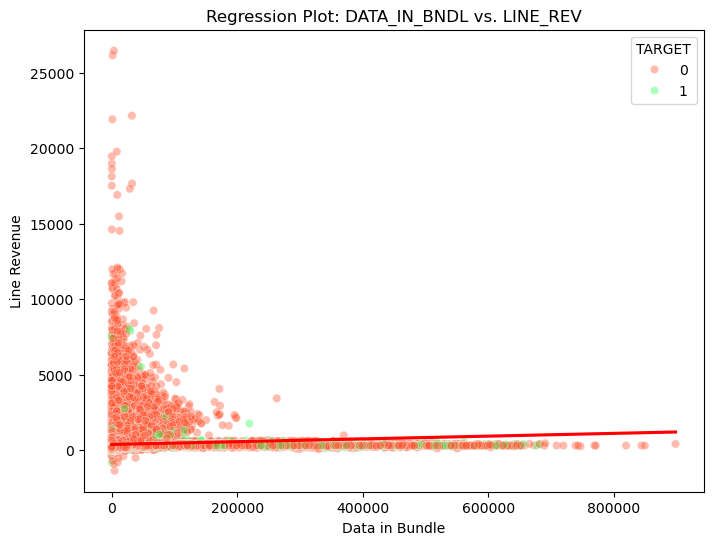

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='DATA_IN_BNDL', y='LINE_REV', data=df, hue='TARGET', palette=['#FF5733', '#33FF57'], alpha=0.4)
sns.regplot(x='DATA_IN_BNDL', y='LINE_REV', data=df, scatter=False, line_kws={'color':'red'})
plt.title('Regression Plot: DATA_IN_BNDL vs. LINE_REV')
plt.xlabel('Data in Bundle')
plt.ylabel('Line Revenue')
plt.show()

 The plot provides valuable insights into how "Data in Bundle" impacts "Line Revenue" and how this relationship varies based on churn status. The separation between churned and non-churned customers implies that these features might be useful in distinguishing between the two groups, making them potentially valuable predictors for churn prediction models.

In [34]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [35]:
from sklearnex import patch_sklearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier

In [37]:
label_encoder = LabelEncoder()
categorical_cols = ['PTY_PROFILE_SUB_TYPE', 'SOCIO_ECONOMIC_SEGMENT', 'PARTY_GENDER_CD', 'STATUS']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [38]:
df.head()

,PTY_PROFILE_SUB_TYPE,SOCIO_ECONOMIC_SEGMENT,PARTY_GENDER_CD,TARGET,BILL_AMOUNT,PAID_AMOUNT,PAYMENT_TRANSACTIONS,PARTY_REV,PREPAID_LINES,POSTPAID_LINES,OTHER_LINES,LINE_REV,STATUS,MOUS_TO_LOCAL_MOBILES,MOUS_FROM_LOCAL_MOBILES,MOUS_TO_LOCAL_LANDLINES,MOUS_FROM_LOCAL_LANDLINES,MOUS_TO_INT_NUMBER,MOUS_FROM_INT_NUMBER,DATA_IN_BNDL,Years_stayed
0,2,0,1,0,931.208938,812.175000,1,5968.700000,2,6,2,945.040000,0,1004.070,35.850,34.015,72.075,141.840,56.115,11944.079102,25
1,1,0,1,0,431.082618,486.500000,1,6245.141667,6,4,2,493.815000,0,159.050,10.595,7.715,11.750,5.110,0.000,9903.157715,25
2,2,0,1,0,50.619644,52.815000,1,1666.488333,2,3,1,50.300000,0,0.000,0.000,0.000,0.000,0.000,0.000,0.102539,25
3,1,0,1,0,399.710034,422.235000,1,2522.008333,3,4,3,406.586667,0,288.805,158.500,2.670,15.965,0.000,0.000,3600.322266,25
4,2,0,1,0,612.665844,825.888333,1,1219.961667,0,2,1,751.185000,0,209.760,186.050,17.515,28.685,3.235,4.475,3852.026367,25


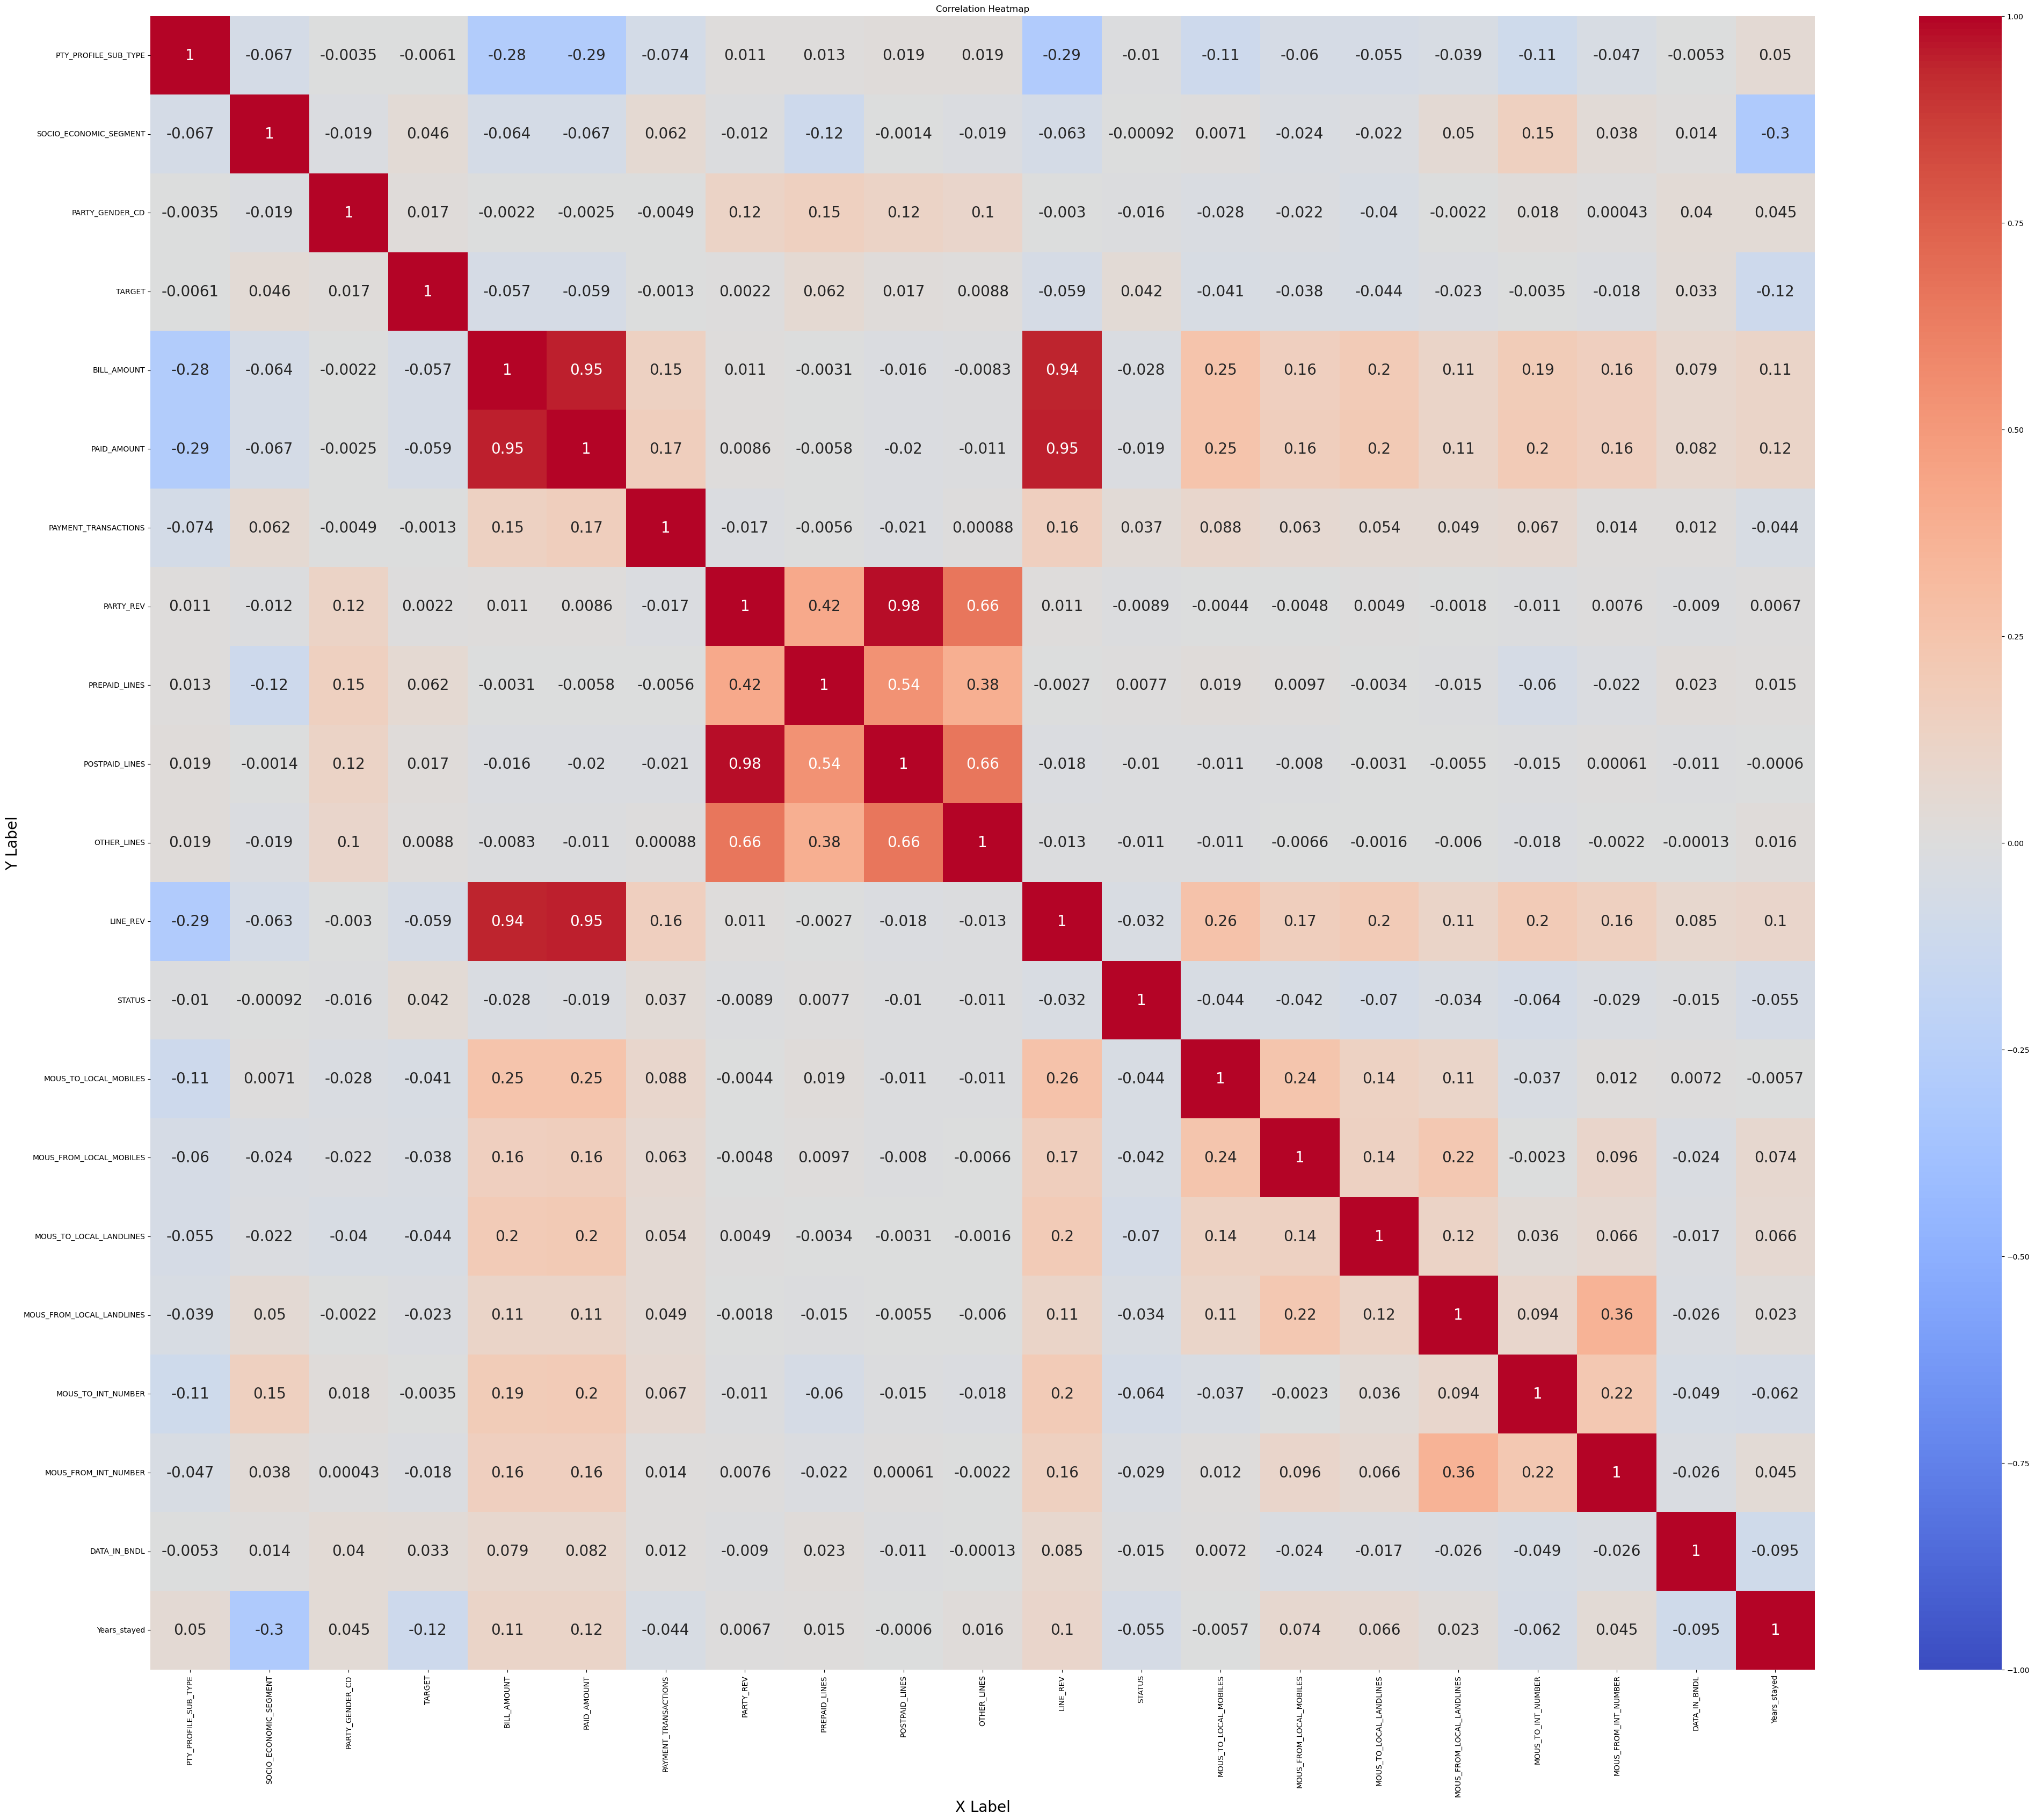

In [39]:
correlation_matrix = df.corr()
plt.figure(figsize=(50, 40)) 
heatmap = sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm', annot_kws={"size": 20},vmax=+1.0,vmin=-1.0) 
heatmap.set_xlabel("X Label", fontsize=20) 
heatmap.set_ylabel("Y Label", fontsize=20) 
plt.title("Correlation Heatmap")
plt.show()

In [40]:
df['SOCIO_ECONOMIC_SEGMENT'].unique()

array([0, 1, 2])

In [41]:
df['STATUS'].unique()

array([0, 5, 6, 1, 8, 4, 2, 7, 3])

In [42]:
df2=df.copy()

In [43]:
X = df.drop(columns=['TARGET'])
y = df['TARGET']

In [44]:
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

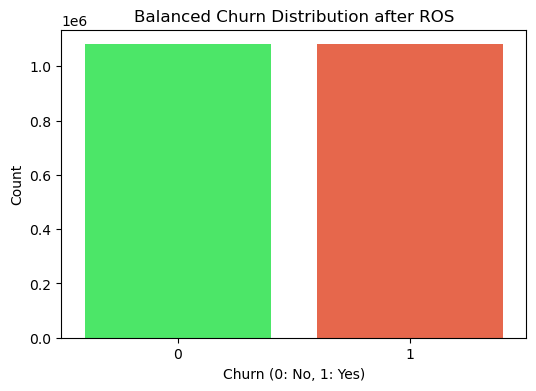

In [45]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled, palette=['#33FF57', '#FF5733'])
plt.title('Balanced Churn Distribution after ROS')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()


In [46]:
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_resampled, y_resampled)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)

In [48]:
selected_indices = selector.get_support(indices=True)

In [49]:
selected_columns = X.columns[selected_indices]

In [50]:
selected_scores = selector.scores_[selected_indices]

In [51]:
df_selected = pd.DataFrame({'Columns': selected_columns, 'Scores': selected_scores})


In [52]:
df_selected.sort_values(by='Scores', ascending=False, inplace=True)



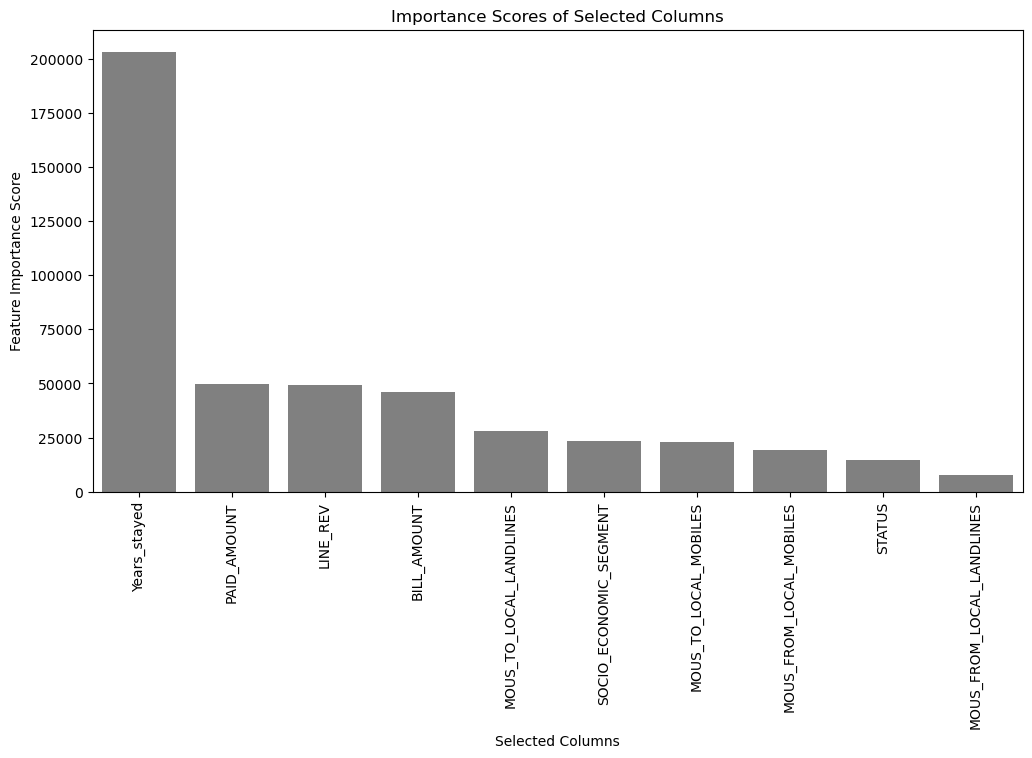

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Columns', y='Scores', data=df_selected, color='grey')
plt.xlabel('Selected Columns')
plt.ylabel('Feature Importance Score')
plt.title('Importance Scores of Selected Columns')
plt.xticks(rotation=90)
plt.show()

 The plot provides valuable insights into the importance of different columns in the dataset for predicting churn. By using feature importance scores, we can identify the most relevant features that influence customer churn and use them to build more effective and efficient churn prediction models.

## Logistic Regression

In [54]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [55]:
y_pred1 = logreg.predict(X_test)

In [56]:
accuracy_lr = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy_lr)

Accuracy: 0.6651865049981488


In [57]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred1))

Confusion Matrix:
[[145406  70834]
 [ 73859 142061]]


## Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [60]:
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [61]:
y_pred2 = naive_bayes.predict(X_test)

In [62]:
accuracy_nb = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy_nb)

Accuracy: 0.5898324694557572


In [63]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))

Confusion Matrix:
[[ 66404 149836]
 [ 27422 188498]]


# KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn1 = KNeighborsClassifier(n_neighbors=5)

In [66]:
knn1.fit(X_train, y_train)

KNeighborsClassifier()

In [67]:
y_pred4 = knn1.predict(X_test)

In [68]:
accuracy_knn1 = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy_knn1)

Accuracy: 0.9161167160310996


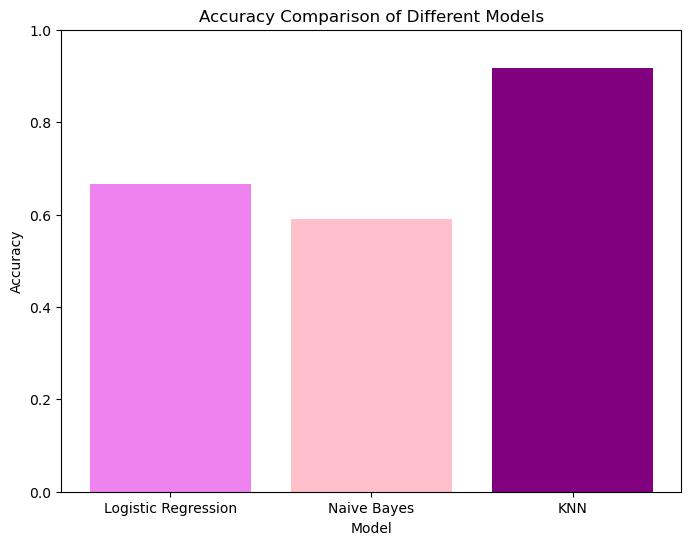

In [69]:
models = ['Logistic Regression', 'Naive Bayes', 'KNN']
accuracies = [accuracy_lr, accuracy_nb, accuracy_knn1]
colors = ['violet', 'pink', 'purple']

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)
plt.show()

 The plot provides a quick and straightforward comparison of the performance of different models in predicting churn. It helps us identify the most accurate model and serves as a basis for further evaluation and decision-making in choosing the appropriate model for churn prediction.

From the above graph we found out that KNN gives the highest accuracy. So we use the KNN model for the prediction of the data and obtaining the output

In [70]:
top_10_features = df_selected['Columns'].values[:10]

In [71]:
top_10_features

array(['Years_stayed', 'PAID_AMOUNT', 'LINE_REV', 'BILL_AMOUNT',
       'MOUS_TO_LOCAL_LANDLINES', 'SOCIO_ECONOMIC_SEGMENT',
       'MOUS_TO_LOCAL_MOBILES', 'MOUS_FROM_LOCAL_MOBILES', 'STATUS',
       'MOUS_FROM_LOCAL_LANDLINES'], dtype=object)

In [72]:
sample_input = {
    'Years_stayed': 3,
    'PAID_AMOUNT': 150,
    'LINE_REV': 250,
    'BILL_AMOUNT': 200,
    'MOUS_TO_LOCAL_LANDLINES': 350,
    'SOCIO_ECONOMIC_SEGMENT': 2,  # Assuming 2 represents 'High'
    'MOUS_TO_LOCAL_MOBILES': 400,
    'MOUS_FROM_LOCAL_MOBILES': 280,
    'STATUS': 3,  # Assuming 1 represents one of the statuses in your dataset
    'MOUS_FROM_LOCAL_LANDLINES': 180
}


In [73]:
prediction = knn1.predict([list(sample_input.values())])

In [74]:
print(prediction)

[0]


In [75]:
sample_input_2 = {
    'Years_stayed': 2,
    'PAID_AMOUNT': 50,
    'LINE_REV': 200,
    'BILL_AMOUNT': 100,
    'MOUS_TO_LOCAL_LANDLINES': 20,
    'SOCIO_ECONOMIC_SEGMENT': 0,  # Assuming 0 represents 'Low'
    'MOUS_TO_LOCAL_MOBILES': 50,
    'MOUS_FROM_LOCAL_MOBILES': 10,
    'STATUS': 3,  # Assuming 3 represents another status in your dataset
    'MOUS_FROM_LOCAL_LANDLINES': 10
}

In [76]:
prediction_2 = knn1.predict([list(sample_input_2.values())])
print(prediction_2)

[0]


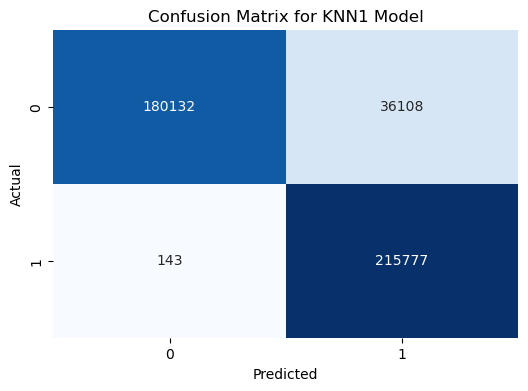

In [77]:
cm = confusion_matrix(y_test, y_pred4)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN1 Model')
plt.show()

In [78]:
df.dtypes

PTY_PROFILE_SUB_TYPE           int64
SOCIO_ECONOMIC_SEGMENT         int64
PARTY_GENDER_CD                int64
TARGET                         int64
BILL_AMOUNT                  float64
PAID_AMOUNT                  float64
PAYMENT_TRANSACTIONS           int64
PARTY_REV                    float64
PREPAID_LINES                  int64
POSTPAID_LINES                 int64
OTHER_LINES                    int64
LINE_REV                     float64
STATUS                         int64
MOUS_TO_LOCAL_MOBILES        float64
MOUS_FROM_LOCAL_MOBILES      float64
MOUS_TO_LOCAL_LANDLINES      float64
MOUS_FROM_LOCAL_LANDLINES    float64
MOUS_TO_INT_NUMBER           float64
MOUS_FROM_INT_NUMBER         float64
DATA_IN_BNDL                 float64
Years_stayed                   int64
dtype: object

In [79]:
import pickle

In [80]:
with open('knn1_model.pkl', 'wb') as file:
    pickle.dump(knn1, file)